In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import seaborn as sns
import cartopy.feature as cfeature
import warnings
import xesmf as xe
import warnings

In [3]:
X_train = np.load('/user/work/al18709/tc_data_flipped/KE_tracks/train_X.npy')
X_miroc = np.load('/user/work/al18709/tc_data_flipped/KE_tracks/ke_miroc6-hist.npy')

In [4]:
print(X_train.shape)
print(X_miroc.shape)

(45623, 6)
(724189, 6)


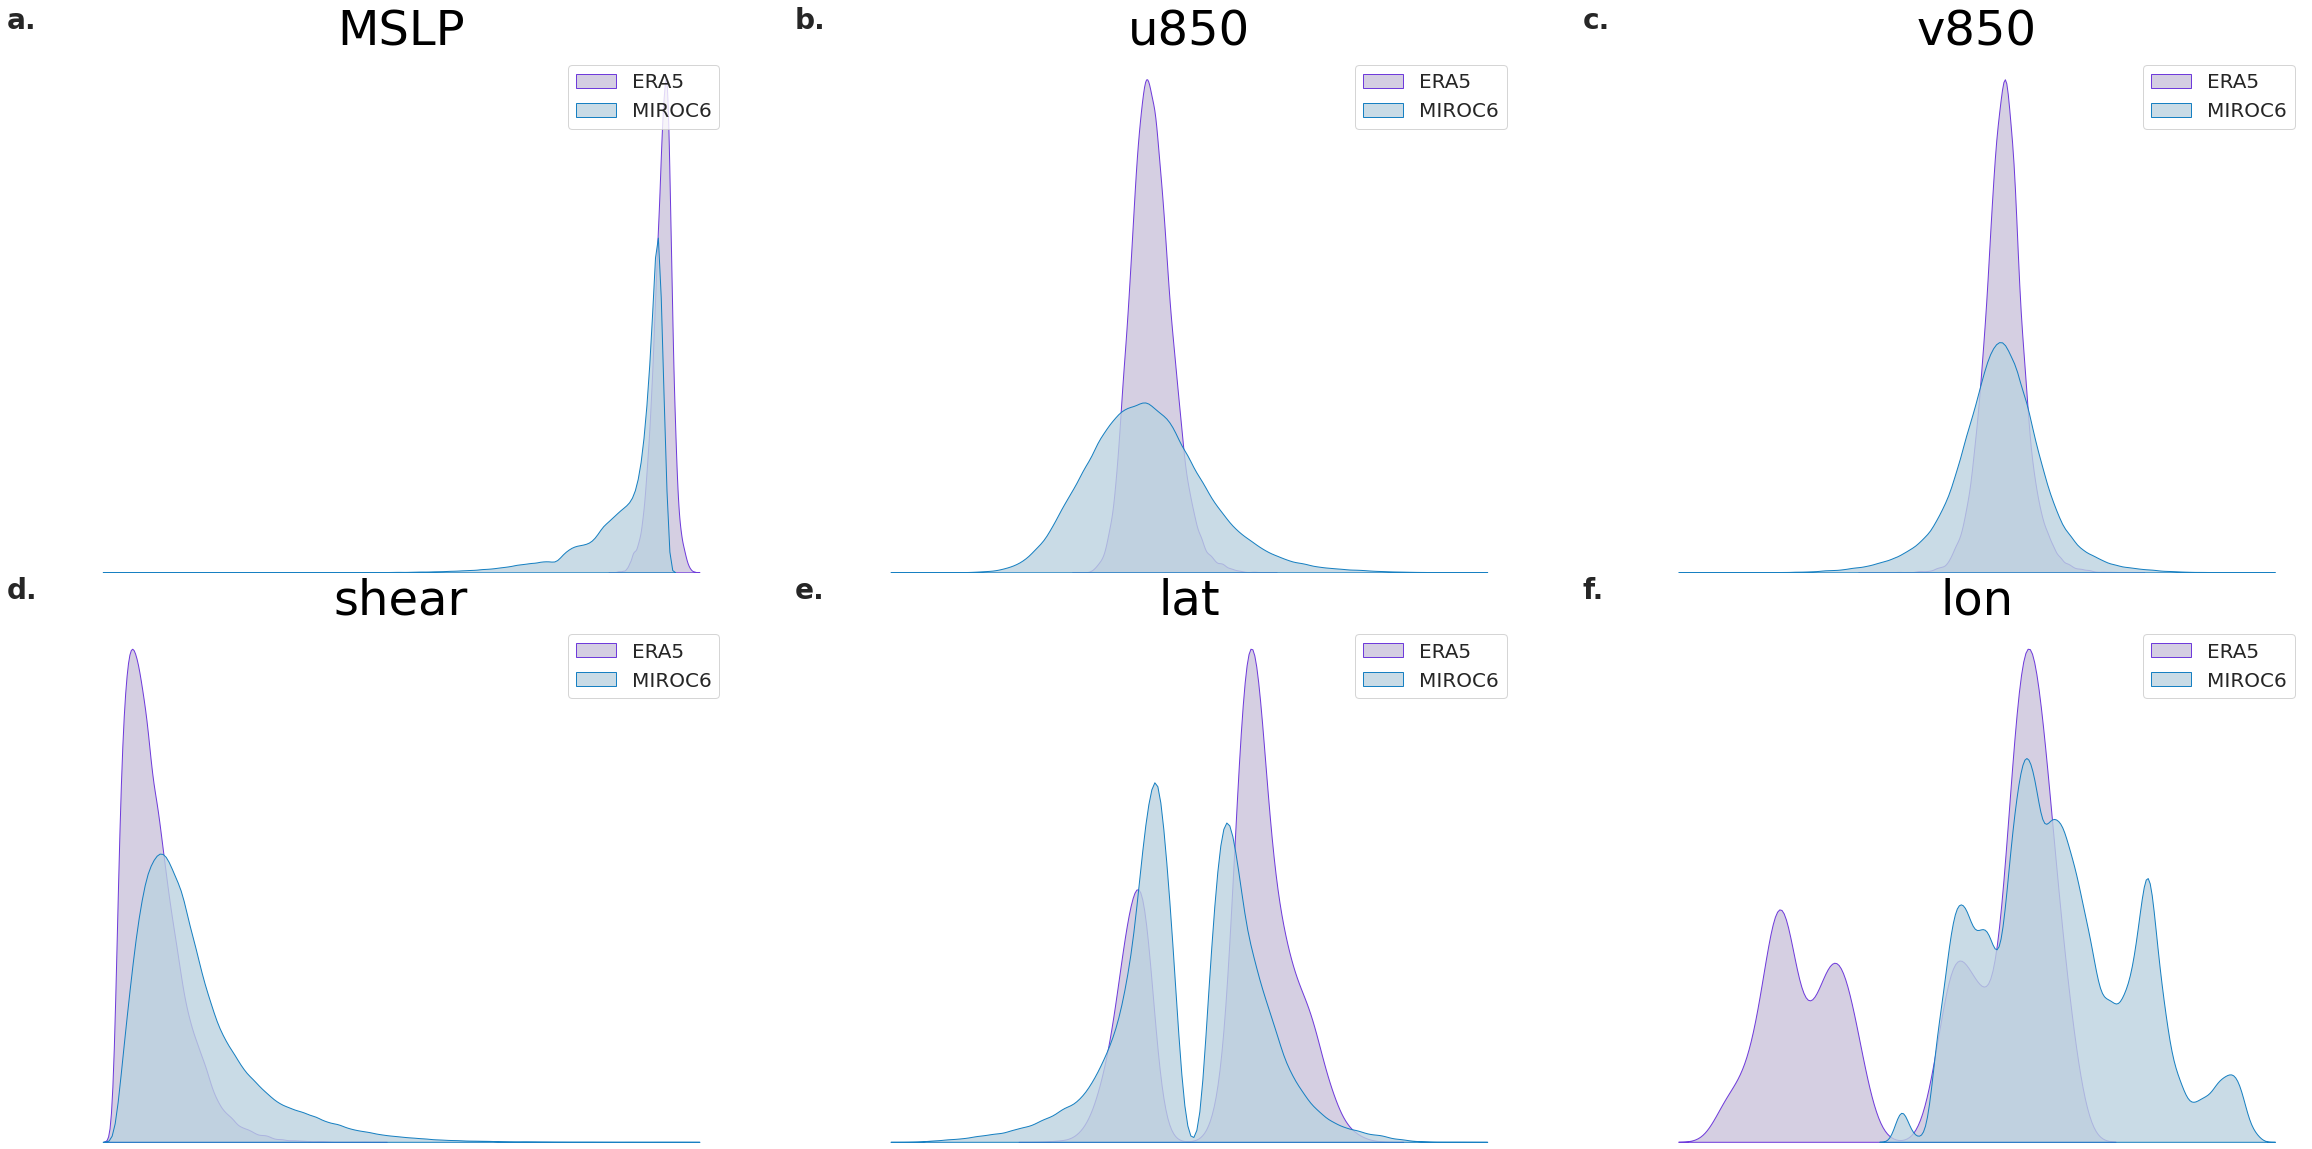

In [5]:

sns.set_context("notebook")
fig, axes = plt.subplots(2,3, figsize=(40, 20))
axes[0, 0].axis('off')
axes[0, 1].axis('off')
axes[0, 2].axis('off')
axes[1, 0].axis('off')
axes[1, 1].axis('off')
axes[1, 2].axis('off')
sns.set_style("ticks")

# dorian
# xlim_1 = (-80,-74)
# ylim_1 = (23,29)
# levels = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 350, 400, 500,550]
# vmax=550
sns.set_style("white")


alpha=0.8
# first kde plot

sns.kdeplot(X_train[:,0].flatten(),fill=True,color='#cbc3db',ax=axes[0,0],alpha=alpha,edgecolor='#6f3bdb')
sns.kdeplot(X_miroc[:,0].flatten(),fill=True,color='#bcd3e0',ax=axes[0,0],alpha=alpha,edgecolor='#1780c2')
# # sns.kdeplot(mswep_real_2.flatten(),fill=True,color='#c3deba',ax=axes[0,0],alpha=alpha,edgecolor='#3b991c')
axes[0,0].legend(['ERA5','MIROC6'],fontsize=20)
axes[0,0].set_title('MSLP',fontsize=48)
axes[0,0].text(-0.1, 1.05, 'a.', transform=axes[0,0].transAxes, size=28, weight='bold')

# second kde plot
sns.kdeplot(X_train[:,1].flatten(),fill=True,color='#cbc3db',ax=axes[0,1],alpha=alpha,edgecolor='#6f3bdb')
sns.kdeplot(X_miroc[:,1].flatten(),fill=True,color='#bcd3e0',ax=axes[0,1],alpha=alpha,edgecolor='#1780c2')
# sns.kdeplot(mswep_real_2.flatten(),fill=True,color='#c3deba',ax=axes[0,1],alpha=alpha,edgecolor='#3b991c')
axes[0,1].legend(['ERA5','MIROC6'],fontsize=20)
axes[0,1].set_title('u850',fontsize=48)
axes[0,1].text(-0.1, 1.05, 'b.', transform=axes[0,1].transAxes, size=28, weight='bold')

# third kde plot
sns.kdeplot(X_train[:,2],fill=True,color='#cbc3db',ax=axes[0,2],alpha=alpha,edgecolor='#6f3bdb')
sns.kdeplot(X_miroc[:,2],fill=True,color='#bcd3e0',ax=axes[0,2],alpha=alpha,edgecolor='#1780c2')
# sns.kdeplot(mswep_real_2.flatten(),fill=True,color='#c3deba',ax=axes[0,2],alpha=alpha,edgecolor='#3b991c')
axes[0,2].legend(['ERA5','MIROC6'],fontsize=20)
axes[0,2].set_title('v850',fontsize=48)
axes[0,2].text(-0.1, 1.05, 'c.', transform=axes[0,2].transAxes, size=28, weight='bold')

# fourth kde plot
sns.kdeplot(X_train[:,3],fill=True,color='#cbc3db',ax=axes[1,0],alpha=alpha,edgecolor='#6f3bdb')
sns.kdeplot(X_miroc[:,3],fill=True,color='#bcd3e0',ax=axes[1,0],alpha=alpha,edgecolor='#1780c2')
# sns.kdeplot(mswep_real_2.flatten(),fill=True,color='#c3deba',ax=axes[0,2],alpha=alpha,edgecolor='#3b991c')
axes[1,0].legend(['ERA5','MIROC6'],fontsize=20)
axes[1,0].set_title('shear',fontsize=48)
axes[1,0].text(-0.1, 1.05, 'd.', transform=axes[1,0].transAxes, size=28, weight='bold')

# third kde plot
sns.kdeplot(X_train[:,4],fill=True,color='#cbc3db',ax=axes[1,1],alpha=alpha,edgecolor='#6f3bdb')
sns.kdeplot(X_miroc[:,4],fill=True,color='#bcd3e0',ax=axes[1,1],alpha=alpha,edgecolor='#1780c2')
# sns.kdeplot(mswep_real_2.flatten(),fill=True,color='#c3deba',ax=axes[0,2],alpha=alpha,edgecolor='#3b991c')
axes[1,1].legend(['ERA5','MIROC6'],fontsize=20)
axes[1,1].set_title('lat',fontsize=48)
axes[1,1].text(-0.1, 1.05, 'e.', transform=axes[1,1].transAxes, size=28, weight='bold')

# third kde plot
sns.kdeplot(X_train[:,5],fill=True,color='#cbc3db',ax=axes[1,2],alpha=alpha,edgecolor='#6f3bdb')
sns.kdeplot(X_miroc[:,5],fill=True,color='#bcd3e0',ax=axes[1,2],alpha=alpha,edgecolor='#1780c2')
# sns.kdeplot(mswep_real_2.flatten(),fill=True,color='#c3deba',ax=axes[0,2],alpha=alpha,edgecolor='#3b991c')
axes[1,2].legend(['ERA5','MIROC6'],fontsize=20)
axes[1,2].set_title('lon',fontsize=48)
axes[1,2].text(-0.1, 1.05, 'f.', transform=axes[1,2].transAxes, size=28, weight='bold')

plt.subplots_adjust(hspace=0.1)
plt.savefig('miroc_vs_era5.png',bbox_inches='tight')

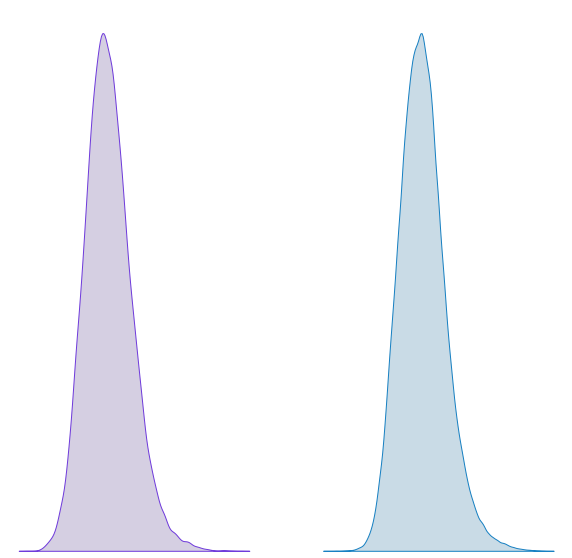

In [6]:
sns.set_context("notebook")
fig, axes = plt.subplots(1,2, figsize=(10, 10))
axes[0].axis('off')
axes[1].axis('off')

sns.set_style("ticks")

sns.kdeplot(X_train[:,1].flatten(),fill=True,color='#cbc3db',ax=axes[0],alpha=alpha,edgecolor='#6f3bdb')
sns.kdeplot(X_miroc[:,1].flatten(),fill=True,color='#bcd3e0',ax=axes[1],alpha=alpha,edgecolor='#1780c2')
plt.show()

In [7]:

from scipy import stats

B = X_train[:,1].flatten()
A = X_miroc[:,1].flatten()
kernel_A = stats.gaussian_kde(A)
kernel_B = stats.gaussian_kde(B)

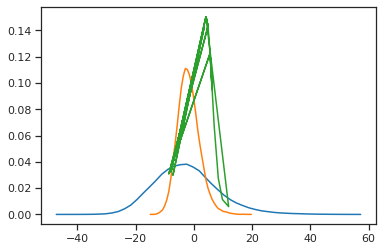

In [22]:
A_space = np.linspace(A.min(), A.max())
evaluated_A = kernel_A.evaluate(A_space)

B_space = np.linspace(B.min(), B.max())
evaluated_B = kernel_B.evaluate(B_space)

plt.plot(A_space,evaluated_A)
plt.plot(B_space,evaluated_B)

A_mapped = []
for a in A[:1000]:
	P_a = kernel_A.evaluate(a)
	closest_P_b_index = (np.abs(evaluated_B - P_a)).argmin()
	a_mapped = B_space[closest_P_b_index]
	A_mapped.append(a_mapped)

kernel_A_mapped = stats.gaussian_kde(A_mapped)
evaluated_A_mapped = kernel_A_mapped.evaluate(A_mapped)
plt.plot(A_mapped,evaluated_A_mapped)


In [ ]:
# So there's this weird inverse rule which could work with diffusion models?